使用Book Crossing 数据集用机器学习模型进行用户年龄的预测

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
books = pd.read_csv('BX-Books.csv',sep=';',escapechar='\\',encoding='ISO-8859-1')
users = pd.read_csv('BX-Users.csv',sep=';',escapechar='\\',encoding='ISO-8859-1')
ratings = pd.read_csv('BX-Book-Ratings.csv',sep=';',escapechar='\\',encoding='ISO-8859-1')

In [3]:
users.head(5)
# books.head()
# users.describe()
# users.shape

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
#delete the empty of age
users_age = users.loc[users['Age'].notnull()]
users_age.head()

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0


In [5]:
# 取出10-70年龄
users_age = users_age.loc[(users['Age']>=10) & (users['Age']<70)]
users_age.describe()

,User-ID,Age
count,164749.000000,164749.000000
mean,139434.898561,34.313094
std,80556.902773,12.972644
min,2.000000,10.000000
25%,69955.000000,24.000000
50%,139415.000000,32.000000
75%,209223.000000,43.000000
max,278855.000000,69.000000


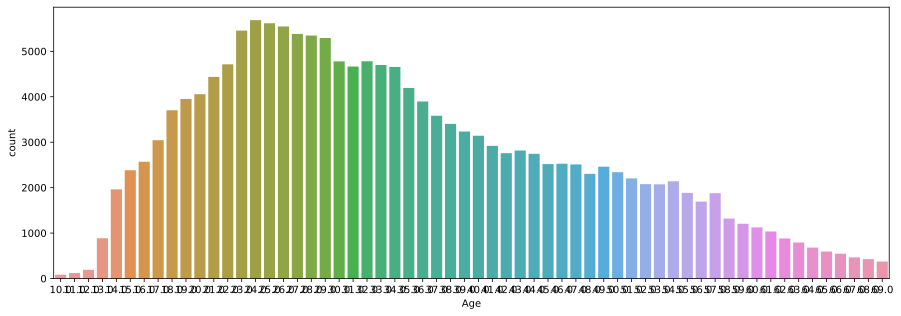

In [6]:
#查看年龄的分布情况
plt.figure(figsize=(15,5))
sns.countplot(users_age['Age'])

# Age_group

In [7]:
#以每10岁为一个年龄段进行分组
users_age['Age_group']=(users_age['Age']/10).astype(int)
users_age.head()

,User-ID,Location,Age,Age_group
1,2,"stockton, california, usa",18.0,1
3,4,"porto, v.n.gaia, portugal",17.0,1
5,6,"santa monica, california, usa",61.0,6
9,10,"albacete, wisconsin, spain",26.0,2
10,11,"melbourne, victoria, australia",14.0,1


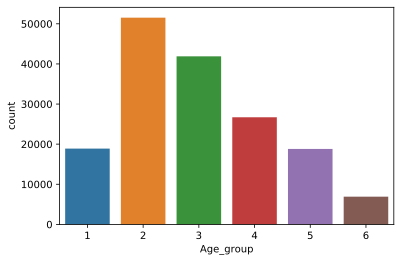

In [8]:
#查看分组后的年龄分布
sns.countplot(users_age['Age_group'])

In [9]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
user_rating_statistics = ratings.groupby('User-ID').count()

In [11]:
user_rating_statistics.head()

,ISBN,Book-Rating
User-ID,,
2,1,1
7,1,1
8,18,18
9,3,3
10,2,2


In [12]:
del user_rating_statistics['ISBN']
user_rating_statistics.columns=['book_count']
user_rating_statistics.head()

,book_count
User-ID,
2,1
7,1
8,18
9,3
10,2


In [13]:
users_full = pd.merge(users_age,user_rating_statistics,on='User-ID',how='inner')#有年龄，有评论，因此做内连接

In [14]:
users_full.head()
users_full.describe()

,User-ID,Age,Age_group,book_count
count,60742.000000,60742.000000,60742.000000,60742.000000
mean,139546.182674,34.969000,3.039939,13.599404
std,80630.499183,13.044005,1.335795,91.139467
min,2.000000,10.000000,1.000000,1.000000
25%,69680.250000,25.000000,2.000000,1.000000
50%,139082.000000,33.000000,3.000000,1.000000
75%,209620.750000,44.000000,4.000000,5.000000
max,278852.000000,69.000000,6.000000,7550.000000


In [15]:
users_full.groupby('Age_group')['book_count'].mean()

Age_group
1     5.467093
2    12.236897
3    16.745354
4    16.351179
5    14.017904
6    11.837292
Name: book_count, dtype: float64

In [16]:
users_full.head(5)

,User-ID,Location,Age,Age_group,book_count
0,2,"stockton, california, usa",18.0,1,1
1,10,"albacete, wisconsin, spain",26.0,2,2
2,19,"weston, ,",14.0,1,1
3,20,"langhorne, pennsylvania, usa",19.0,1,1
4,36,"montreal, quebec, canada",24.0,2,1


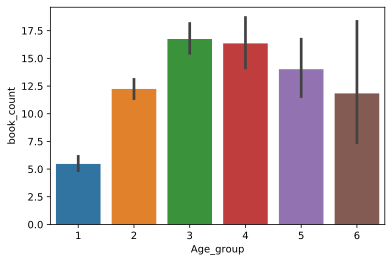

In [17]:
sns.barplot(x='Age_group',y='book_count',data=users_full)

# bad_ratings_count

In [18]:
bad_ratings = ratings.loc[(ratings['Book-Rating']>=1) & (ratings['Book-Rating']<=5)].groupby('User-ID').count()
del bad_ratings['Book-Rating']
bad_ratings.columns=['bad_ratings_count']
bad_ratings.head(5)

,bad_ratings_count
User-ID,
8,4
14,2
17,2
53,1
69,1


In [19]:
users_full_new = users_full.merge(bad_ratings,on='User-ID',how='left')
users_full_new.head()
users_full_new.describe()

,User-ID,Age,Age_group,book_count,bad_ratings_count
count,60742.000000,60742.000000,60742.000000,60742.000000,14409.000000
mean,139546.182674,34.969000,3.039939,13.599404,3.002013
std,80630.499183,13.044005,1.335795,91.139467,10.896989
min,2.000000,10.000000,1.000000,1.000000,1.000000
25%,69680.250000,25.000000,2.000000,1.000000,1.000000
50%,139082.000000,33.000000,3.000000,1.000000,1.000000
75%,209620.750000,44.000000,4.000000,5.000000,2.000000
max,278852.000000,69.000000,6.000000,7550.000000,684.000000


In [20]:
users_full_new['bad_ratings_count'].fillna(0,inplace=True)
users_full_new.describe()

,User-ID,Age,Age_group,book_count,bad_ratings_count
count,60742.000000,60742.000000,60742.000000,60742.000000,60742.000000
mean,139546.182674,34.969000,3.039939,13.599404,0.712127
std,80630.499183,13.044005,1.335795,91.139467,5.458694
min,2.000000,10.000000,1.000000,1.000000,0.000000
25%,69680.250000,25.000000,2.000000,1.000000,0.000000
50%,139082.000000,33.000000,3.000000,1.000000,0.000000
75%,209620.750000,44.000000,4.000000,5.000000,0.000000
max,278852.000000,69.000000,6.000000,7550.000000,684.000000


In [21]:
users_full_new.groupby('Age_group')['bad_ratings_count'].count()

Age_group
1     6564
2    17611
3    16305
4    10180
5     7261
6     2821
Name: bad_ratings_count, dtype: int64

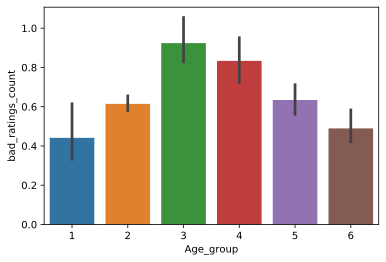

In [22]:
sns.barplot(x='Age_group',y='bad_ratings_count',data=users_full_new)

# good_ratings_count

In [23]:
good_ratings = ratings.loc[ratings['Book-Rating']>=6].groupby('User-ID').count()
del good_ratings['ISBN']
good_ratings.columns=['good_ratings_count']
good_ratings.head(5)

,good_ratings_count
User-ID,
8,3
9,1
10,1
12,1
14,1


In [24]:
users_full_new1 = users_full_new.merge(good_ratings,on='User-ID',how='left')
users_full_new1['good_ratings_count'].fillna(0,inplace=True)
users_full_new1.head()
users_full_new1.describe()

,User-ID,Age,Age_group,book_count,bad_ratings_count,good_ratings_count
count,60742.000000,60742.000000,60742.000000,60742.000000,60742.000000,60742.000000
mean,139546.182674,34.969000,3.039939,13.599404,0.712127,4.219189
std,80630.499183,13.044005,1.335795,91.139467,5.458694,30.440379
min,2.000000,10.000000,1.000000,1.000000,0.000000,0.000000
25%,69680.250000,25.000000,2.000000,1.000000,0.000000,0.000000
50%,139082.000000,33.000000,3.000000,1.000000,0.000000,1.000000
75%,209620.750000,44.000000,4.000000,5.000000,0.000000,2.000000
max,278852.000000,69.000000,6.000000,7550.000000,684.000000,5642.000000


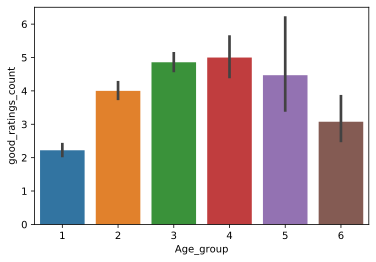

In [25]:
sns.barplot(x='Age_group',y='good_ratings_count',data=users_full_new1)

# 数据拟合

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [27]:
clf = KNeighborsClassifier(5) # knn k= 5

In [28]:
X = users_full_new1[['book_count','bad_ratings_count','good_ratings_count']] #构造特征

In [29]:
y = users_full_new1['Age_group']

In [30]:
acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy') #交叉验证

In [31]:
print(acc)

[0.27314624 0.25757326 0.27271979 0.26885084 0.26648555]


In [32]:
np.mean(acc) #acc很低

0.26775513741887824